In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
import kpp4py

In [3]:
#ds = xr.open_dataset('KPP_fields.nc')
ds = xr.open_dataset('../../../rundirs/geosfp_4x5_HetChemOff/KPP_fields_100.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, nspec
Data variables:
    C_before  (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    C_after   (lev, lat, lon, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PHY       (lev, lat, lon, nphy) float64 203.3 703.9 2.508e+19 1.243e+14 ...
    RCONST    (lev, lat, lon, nreact) float64 1.872e-15 1.668e-14 8.976e-16 ...

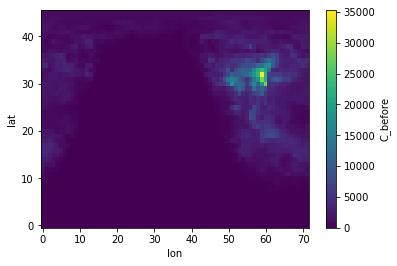

In [4]:
ds['C_before'][0,...,227].plot()

In [5]:
ds_sub = ds.isel(lev=slice(0, 2)).stack(sample=('lev', 'lat', 'lon')).T
ds_sub

<xarray.Dataset>
Dimensions:   (nphotol: 130, nphy: 4, nreact: 725, nspec: 240, sample: 6624)
Coordinates:
  * sample    (sample) MultiIndex
  - lev       (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lat       (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - lon       (sample) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Dimensions without coordinates: nphotol, nphy, nreact, nspec
Data variables:
    C_before  (sample, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    C_after   (sample, nspec) float64 5.722e+03 1.662e+06 1.446e+05 ...
    PHOTOL    (sample, nphotol) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PHY       (sample, nphy) float64 203.3 703.9 2.508e+19 1.243e+14 203.3 ...
    RCONST    (sample, nreact) float64 1.872e-15 1.668e-14 8.976e-16 ...

In [6]:
all_c_before = ds_sub['C_before'].values
all_phy = ds_sub['PHY'].values
all_photol = ds_sub['PHOTOL'].values

all_c_after_true = ds_sub['C_after'].values # for verification
all_c_after_true.shape

(6624, 240)

In [7]:
%%time
all_c_after = kpp4py.onestep(all_c_before.T, all_phy.T, all_photol.T).T
all_c_after.shape

CPU times: user 12.5 s, sys: 49 ms, total: 12.6 s
Wall time: 12.5 s


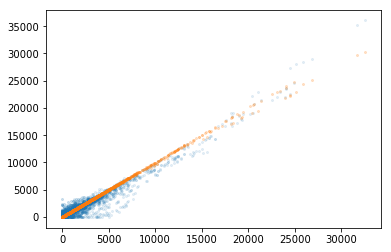

In [8]:
ispec = 227
plt.scatter(all_c_after[:,ispec], all_c_before[:,ispec], alpha=0.1, s=4)
plt.scatter(all_c_after[:,ispec], all_c_after_true[:,ispec], alpha=0.2, s=4)